In [19]:
import cv2
import os
import json
import numpy as np
import matplotlib.pylab as plt 

In [1]:
img_folder_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/images"
ann_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/annotations.json"

In [2]:
def load_json(path:str) -> list | dict:
    with open(path, 'rb') as read_file:
        ann = json.load(read_file)
    return ann

In [6]:
ann = load_json(ann_path)

In [15]:
bbox_ann = ann['annotations'][23]
bbox_ann

{'id': 24,
 'image_id': 17,
 'bbox': [216, 138, 5, 18],
 'category_id': 1,
 'area': 90,
 'iscrowd': 0}

In [13]:
img_ann = ann['images'][bbox_ann['image_id'] - 1]
img_ann

{'id': 17, 'file_name': 'window_vid_1_5053_0.jpg', 'width': 224, 'height': 224}

In [18]:
img_path = os.path.join(img_folder_path, img_ann['file_name'])
img = cv2.imread(img_path)
assert type(img) == np.ndarray
print(img.shape)
print(img.dtype)

(224, 224, 3)
uint8


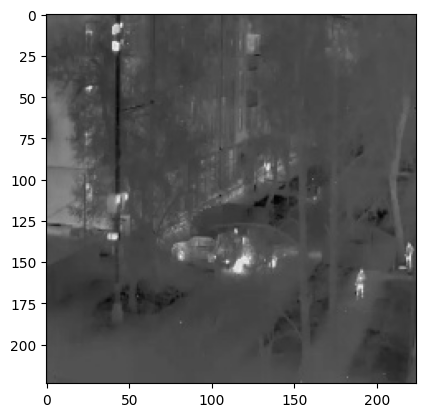

In [20]:
plt.imshow(img)

In [21]:
coco_img_path = "home/max/ieos/data/coco/train2017/000000000025.jpg"
img = cv2.imread(img_path)
assert type(img) == np.ndarray
print(img.shape)
print(img.dtype)

(224, 224, 3)
uint8


In [27]:
coco_ann_path = "/home/max/ieos/data/coco/annotations/instances_train2017.json"
coco_ann = load_json(coco_ann_path)

In [28]:
coco_ann.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [29]:
coco_ann['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [30]:
coco_ann['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [32]:
bbox_ann

{'id': 24,
 'image_id': 17,
 'bbox': [216, 138, 5, 18],
 'category_id': 1,
 'area': 90,
 'iscrowd': 0}